In [1]:
from IPython.core.display import HTML
css_file = 'numericalmoocstyle.css'
#css_file = 'style.css'
HTML(open(css_file, 'r').read())

In [2]:
import sympy as sym
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from IPython.display import Image

In [4]:
sym.init_printing(use_latex = "mathjax")

# Graph theory

## In this lesson

Follow these links
- [Introduction](#Introduction)
- [Linked lists and pointers](#Linked-lists-and-pointers)
- [Stacks and queues and priority queues](#Stacks-and-queues-and-priority-queues)
- [Graphs](#Graphs)
- [Walks, trails, paths and connectivity](#Walks,-trails,-paths-and-connectivity)
- [Adjacency matrices](#Adjacency-matrices)
- [Incidence matrices](#Incidence-matrices)
- [A first look at networkx](#A-first-look-at-networkx)
- [Graphs as combinations](#Graphs-as-combinations)
- [Neighbors of a vertex](#Neighbors-of-a-vertex)
- [Subgraphs](#Subgraphs)
- [Weighted graphs](#Weighted-graphs)
- [Tree graphs](#Tree-graphs)
- [Planar graphs](#Planar-graphs)
- [Nonplanar graphs](#Nonplanar-graphs)
- [Coloring](#Coloring)
- [](#)
- [](#)
- [](#)
- [](#)
- [](#)
- [](#)
- [](#)

## Introduction

**Graph Theory** uses graphs as mathematical objects to model pairwaise relations between objects.  We can use it to optimize structures such as algorithms for computer memory storage.

[Back to the top](#In-this-lesson)

## Linked lists and pointers

The first method that helps increase the efficiency of steps required to retrieve information, constructs that information into **Lists** and **Pointers**.<p/>
This is best described with an example.  Consider a list of surgical residents (registrars) in training.  There is also a list of patients on who they have operated.  Each resident will have operated on more than one patient.  We need to divide a good strategy to answer two questions:
- Given a patient, find the name of the resident
- Given the resident, find all the patients of which they operated

Let's consider three methods.  We will have alist of patients in alphabetical order, $ A,B,C,D,E,F,G,H,I,J $ and residents $ I,II,II $.

*Method 1* would require a two-dimensional array
$$ \begin{matrix} A & I \\ B & I \\ C & II \\ D & III \\ E & II \\ F & III \\ G & I \\ H & III \\ I & II \\ J & I \end{matrix} $$
To find a resident given a patient would be easy enough.  We just run down the first column and read in the value in the second column of the same row.  Things won't be so efficient finding the patients of a given resident.

*Method 2* will have us construct a matrix
$$ \begin{matrix}  & I & II & III \\ A & 1 & 0 & 0 \\ B & 1 & 0 & 0 \\ C & 0 & 1 & 0 \\ D & 0 & 0 & 1 \\ E & 0 & 1 & 0 \\ F & 0 & 0 & 1 \\ G & 1 & 0 & 0 \\ H & 0 & 0 & 1 \\ I & 0 & 1 & 0 \\ J & 1 & 0 & 0 \end{matrix} $$
This is also inefficient.  As we scale up, there will be a lot of $ 0 $ values.

In *Method 3* we have lists and pointers.  In the graphic below we answer question two, given a resident (here, number II).  The list tells us to go to row 3, by the use of a pointer, giving us patient C.  It also then points us to row 5, giving patient E and so on.  The $ 0 $ is a **Null Pointer**.

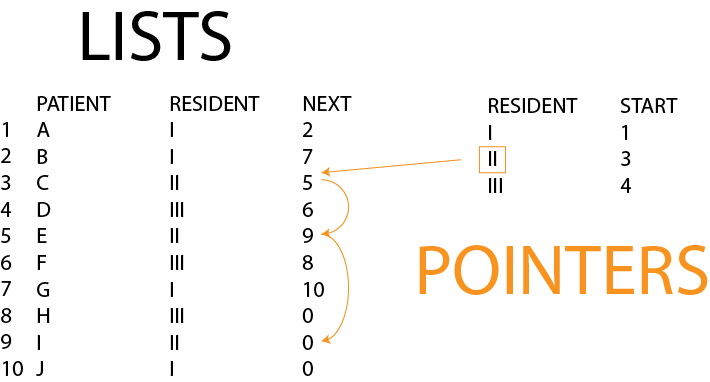

In [5]:
Image("Lists_pointers.png")

[Back to the top](#In-this-lesson)

## Stacks and queues and priority queues

Another system that makes data retrieval more efficient involves **Stacks**, **Queues** and **Priority Queues**.<p/>
A **Stack** is also referred to as a **LIFO list**.  LIFO here stands for last-in-first-out.  It is a list of elements, to which we can add or delete only at the end,c all the **Top of the List**.<p/>
A **Queue** is also refferd to as a **FIFO list**.  FIFO stand for first-in-first-out.  Here we can delete at one end of the list referred to as the **Rear** and additions can only be made at the other end, called to **Front**.<p/>
With a **Priority Queue** we can add elements, but delete only the element with the highest priority.

[Back to the top](#In-this-lesson)

## Graphs

A **Graph** is an ordered pair of sets (by this we mean that there are two sets).  The first set is called the **Set of Vertices** and the second is the **Set of Edges**.  These sets are usually referred to as $ V = \left\{ {v}_{1},{v}_{2}, \dots \right\} $ for the set of **Vertices**, also called **Points** or **Nodes** and $ E = \left\{ {e}_{1},{e}_{2}, \dots \right\} $ for the set if **Edges**.  The gives us a graph, $ {G}{\left( V,E \right)} $.<p/>
These sets are not independent.  Every edge corresponds to two vertices, called **End-Points**.  **Adjacent Edges** share a common vertex.<p/>
Each edge $ {e}_{k} $ is identified with two vertices, written as the unordered pair $ \left( {v}_{i},{v}_{j} \right) $.  Being unordered, these are actually a reference to **Undirected Graphs**.  There are also **Directed Graphs** where the order of the vertices are important.

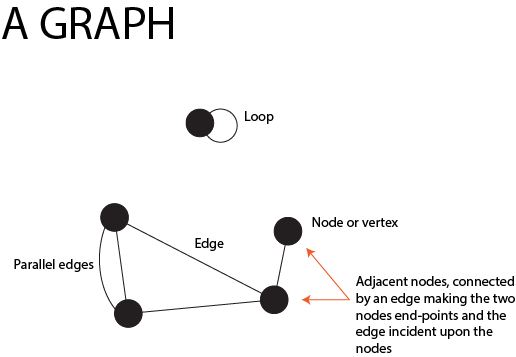

In [6]:
Image("Graph.png")

Vertices $ {v}_{i} $ and $ {v}_{j} $ are said to be **Adjacent** or **Neighbors** if there is an edge, $ e = \left\{ {v}_{i},{v}_{j} \right\} $ that connect them.  Now $ {v}_{i} $ and $ {v}_{j} $ are called the **End-points** of $ e $ and $ e $ **Connects** $ {v}_{i} $ and $ {v}_{j} $ or is **Incident Upon** $ {v}_{i} $ and $ {v}_{j} $.

Some vertices have edges that loop back to themselves.  These edges are called **Loops**.  There may also be more than one edge connecting the same two vertices.  These are called **Parallel Edges** or **Multiple Edges**.  Such graphs are sometimes called **Multigraphs**.  This is not always so, as all graphs are graphs and some texts refer to graphs without loops or multiple edges as **Simple Graphs**.

The **Degree of a Vertex** is the number of edges that contain it.  Parallel edges are counted individually and a loop counts as two edges.  The sum of the degree of the vertices is twice the number of edges, since each edge is counted twice in the degree of the vertices.  Vertices are also classified as **Even** or **Odd** depending on its degree being an even or odd integer.  Some texts refer to the **Minimum Degree** of the vertices in a graph (vertex / vertices with the lowest degree), denoted by $ \delta G $ and the **Maximum Degree** of the vertices, denoted by $ \Delta G $ (vertex / vertices with highest degree).<p/>
A vertex of degree $ 0 $ is an **Isolated Vertex**.

A **Pendant Vertex** is a vertex with degree $ 1 $ and an edge that has a pendant vertex as an end vertex is a **Pendant Edge**.

Graphs with a finite number of edges is called a **Finite Graph** and will have a finite number of edges.  A finite graph with a single vertex and no edges (loop) is a point and referred to as a **Trivial Graph**.  A graph with no edges is also called an **Empty Graph** and a graph with neither vetices, nor edges, is called a **Null Graph**.

A graph $ { G }_{ 2 }={ G }_{ 2 }\left( { V }_{ 2 },{ E }_{ 2 } \right)  $ is said to be a [**Subgraph**](#Subgraphs) of a graph $ { G }_{ 1 }={ G }_{ 1 }\left( { V }_{ 1 },{ E }_{ 1 } \right)  $ if $ { V }_{ 2 }\subseteq { V }_{ 1 } $ and $ { E }_{ 2 }\subseteq E_{ 1 } $.<p/>
If $ v $ is a vertex in a graph $ G $, then the subgraph $ G - v $ is obtained by removing the vertex $ v $ and also deleting all the edges that contain $ v $.<p/>
If $ e $ is an edge in the graph $ G $ then the subgraph $ G - e $ is obtained by deleting the edge $ e $ from $ G $.

**Isomorphic graphs** have a one-to-one correspondence $ f:{V}_{1} \rightarrow {V}_{2} $ such that $ \left[ u,v \right] $ is an edge of $ {G}_{1} $ if and only if $ \left[ {f}{\left( u \right)},{f}{\left( v \right)} \right] $ is an edge of $ {G}_{2} $.  If this is a bit confusing, consider that $ f $ is a bijection (a map from a set to another) that is both *one-to-one* (injective) and *onto* (surjective).<p/>
<p>In a one-to-one mapping each element in the first set maps to a unique element in the second set.  Not all elements in the second set need an element in the first set that maps to it.  In onto mapping, each element in the second set is mapped to by an element (or more than one lements) in the first set.  The figure below illustrates.</p>

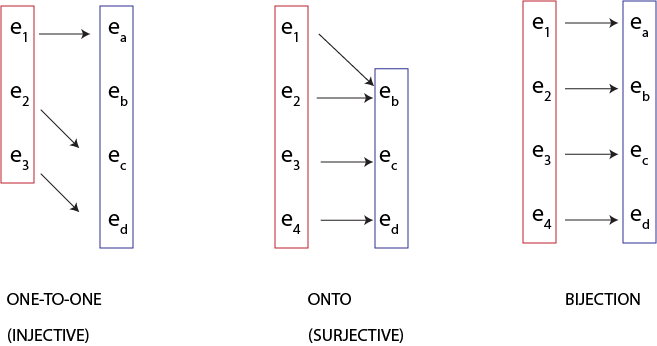

In [7]:
# Figure illustrating an injective and a surjective function
Image("Bijection.png")

Note how the letters $ K $ and $ X $ as well as $ T $ and $ F $ are isomorphic noted as $ K\cong X $ and $ T\cong F $.

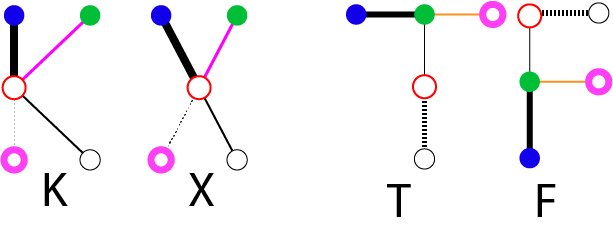

In [8]:
Image("IsomorphicGraphs.png")

There are a few steps to go through to test for isomorphims:
- Are the number of vertices the same
- Are the number of edges the same
- Structural similarities
    - Degree of vertices
    - Bipartite or not
    - Sets of mutually non-adjacent vertices
    - $ \vdots $

**Homeomorphic graphs** graphs are graphs that are created from other graphs, by simply adding extra vertices to the latter.

[Back to the top](#In-this-lesson)

## Walks, trails, paths and connectivity

A **Walk** in a graph is a sequence $ W = {v}_{0}, {e}_{1}, {v}_{1}, {e}_{2}, {v}_{2}, \dots , {v}_{k-1}, {e}_{k}, {v}_{k} $.  The vertex and edge terms need not be distinct, so that as we go along the sequence in our walk, we can re-encounter both vertices and edges, i.e. $ \left( {v}_{i-1}, {v}_{i} \right) = {e}_{i} \quad \forall \quad 1 \le i \le l $. When the graph is simple, we only note the vertices since there are no parallel edges and all the vertices are connected.
<p>A **Trail** is a walk in which all the edges are distinct.  We cannot pass the same edge twice.</p>
<p>A **Path** follows a sequence as above, without encountering the same vertex or edge more than once.</p>

When following a path, the number of edges that is traversed is called the **Length** of the path.

A **Closed** walk, trail or path has $ {v}_{0} = {v}_{n} $ (we start and end at the same vertex, i.e. the initial and terminal vertices are the same vertex).

It is common to denote distinct vertices of a graph $ G $ as $ x,y \in V \left( G \right) $.  From this we state every walk in $ G $ as an $ xy $-walk.  We also have a theorem that states that if $ x,y $ are disttinct vertices of $ G $ then every $ xy $-walk in $ G $ contains an $ xy $-path.

The proof of this is easy to grasp.  First we describe the $ xy $-walk with $ x $ being the first vertex and $ y $ being the last: $ W: \quad x = {u}_{0}, {u}_{1}, {u}_{2}, \dots , {u}_{k} = y $.  With the vertices being distinct, we in fact have a path.  If we do come a cross a repeated vertex, say $ {i}_{i} = {u}_{j} $ then we can omit the walk that extend from this vertex as in the image below.  We still have a path then.

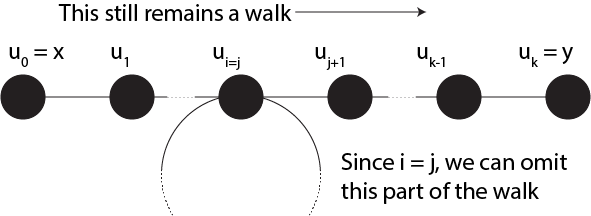

In [9]:
Image("WalkPath.png")

A **Cycle** is a closed path of length $ 3 $ or more in which all the vertices are distinct, except for $ {v}_{0} = {v}_{n} $.  A cycle of length $ k $ is called a $ K $-cycle.

A **Connected Graph** has a path between all vertices (see below).

A graph can be partitioned into connected components.  A **Connected Component** is a subgraph of a graph if it is not contained within any larger connected subgraph.<p/>
An **Isolated Vertex** in a graph is a disconnected component.

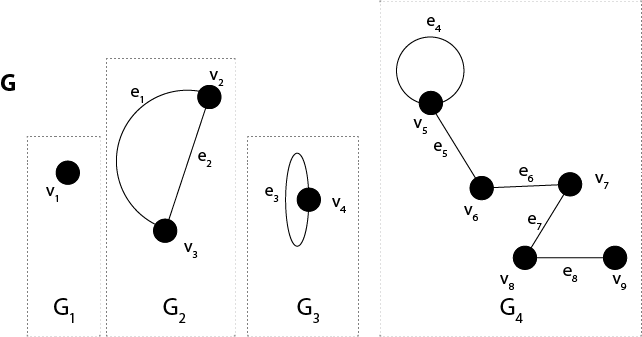

In [10]:
Image("Components.png")

So, if graph $ G $ (as above) has a vertex $ v $ that is connected to a vertex of a component of $ G $, the $ v $ is also a vertex of that component.  Every vertex of $ G $ belongs to only one component of $ G $ and so for every edge of $ G $.

A graph $ G $ with $ n $ vertices, $ m $ edges and $ k $ components has a **Rank**, $ {\rho}{\left( G \right)} = n - k $ and a **Nullity**, $ {\mu}{\left( G \right)} = m - n + k $.<p/>
Note that $ {\rho}{\left( G \right)} \ge 0 $ and that $ {\rho}{\left( G \right)} + {\mu}{\left( G \right)} = m $.  Also, $ {\mu}{\left( G \right)} \ge 0 $ because $ {\rho}{\left( G \right)} \le m $.

For our graph, $ G $, abobe we have $ n = 9 $, $ m = 8 $ and $ k = 4 $.  Thus
$$ {\rho}{\left( G \right)} = 9 - 4 = 5 \\ {\mu}{\left( G \right)} = 8 - 9 + 4 = 3 \\ {\rho}{\left( G \right)} + {\mu}{\left( G \right)} = 8 $$

The **Distance** between two vertices $ u $ and $ v $ is the shortest path between them and written as $ {d}{\left( u,v \right)} $.

The **Diameter** of a graph is the maximum distance between any two vertices and written as diam$ \left( G \right) $ (i.e. take all the combinations of two vertices and the distance between them, then the diameter is the maximum distance).  

A **Cutpoint** is a vertex that if removed from a graph, $ G - v $, leaves the graph disconnected.  Remember that with $ G - v $ we remove the vertex and all the edges connected to it.

A **Bridge** is an edge that if removed from a graph, $ G - e $, leaves the graph disconnected.  The endpoints of a bridge are both **Cutpoints**.

A **Traversable Graph** is a graph where there is a path connecting all the vertices, without creating parallel edges.  Such a path must be a trail and is also called a **Traversable Trail**.

In our first look at a practical example of graphs, we look at the famous Königsberg problem.  A town with two islands in a river, connected by seven bridges.  The question was asked whether a person can start anywhere and traverse all the bridges, but, only once.

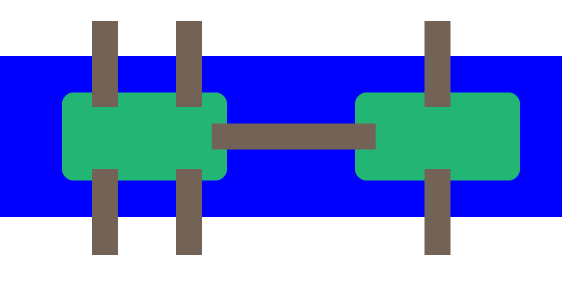

In [11]:
Image("Konigberg-01.png")

We can turn this into a graph.

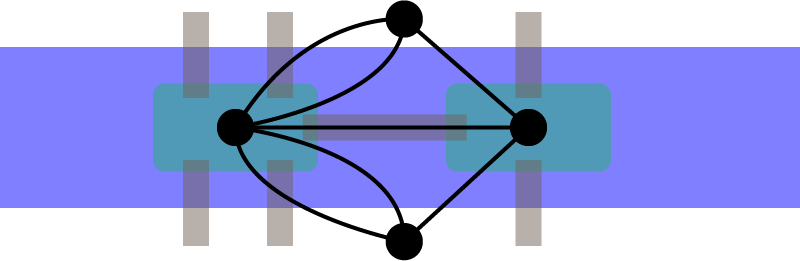

In [12]:
Image("KonigbergGraph.png")

The townsfolk tasked Leonard Euler to solve the problem.  He proved the negative of the following, which is actually easy to understand.  Consider any vertex.  If it is an even vertex (i.e. its edges come in pairs), you can always come and go trhough it.  If it is odd, you can only traverse it once.  If you try again, you will have to use an edge twice (either coming or going).  It must thus be the start or endpoint.  This means that if a graph has more than two odd vertex, it is not a travesable trail.<p/>
The graph of Königsberg graph above has four odd vertices, so is not a traversable graph.  An **Eulerian Trail** has a closed, travesable trail.  This gives us the **Eulerian Graph Theorem** that states that a finite connected graph is Eulerian if and only if each vertex has an even degree.  In a corollary to this we can state that any finite conencted graph with two odd vertices is traversable.  A traversable trail may begin at either odd vertex and will end at the other one.

Remember that every edge must have two vertices, therefor $ \sum _{ i }^{ n }{ d\left( { v }_{ i } \right)  } =2m $, where $ m $ is the number of edges.

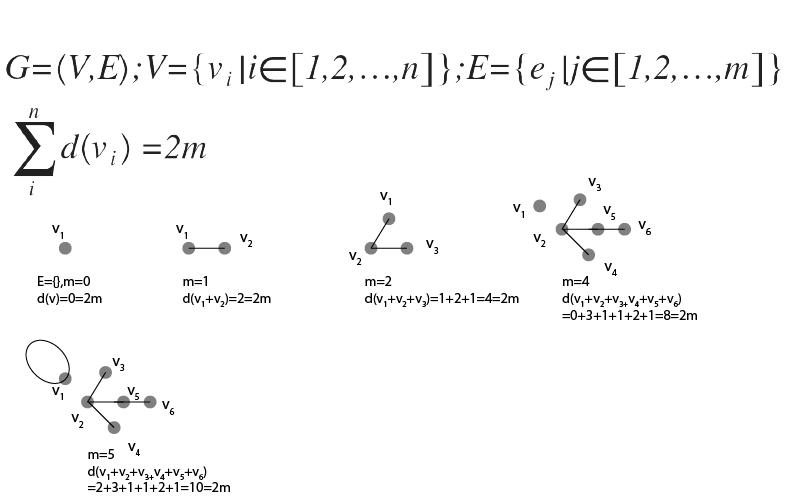

In [13]:
Image("Graph1.png")

<hr>

A **Complete Graph** contains all the possible edges between the vertices.  It is denoted by $ {K}_{n} , n \in \left[ 1,2,3, \dots \right] $.

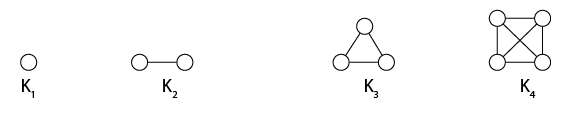

In [14]:
Image("Connected-01.png")

<hr>

In a **Regular Graph**, each vertex has the same number of edges.  We note it as a graph that is regular of degree $ k $ or simply, a $ k $-regular graph.<p/>
A complete graph with $ n $ vertices is regular of degree $ n - 1 $.

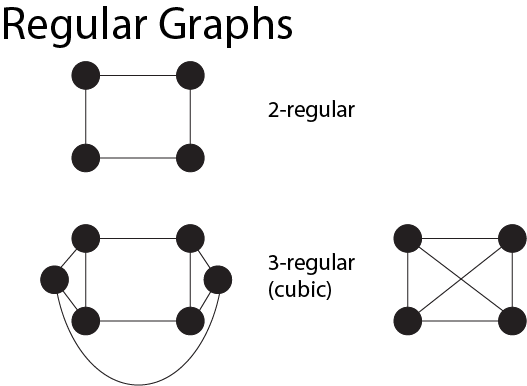

In [15]:
Image("RegularGraphs.png")

<hr>

A **Hamiltonian Graph** is a closed path that visits every vertex only once (the edges may be repeated).  

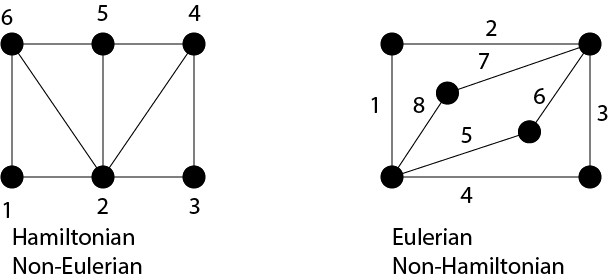

In [16]:
Image("HamiltonianGraph.png")

If a graph is disconnected it cannot be Hamiltonian.  There is a theorem, let's call it the **Hamiltonian Graph Theorem** which states that if we let $ G $ be a connected graph with $ n $ vertices, then it is Hamiltonian if $ n \ge 3 $ and $ n \le $ deg$ \left( n \right) $ for each vertex $ v $ in $ G $.

<hr>

A graph is **Bipartite** if its vertices $ V $ can be partioned off into two subsets, usually termed $ M $ and $ N $, such that each edge of the graph as a whole, connects a vertex in $ M $ to a vertex in $ N $.<p/>
If each vertex in $ M $ is connected to each vertex in $ N $, it is termed a **Complete Bipartite Graph**, denoted as $ {K}_{m,n} $, with $ m $ the number of vertices in $ M $ and $ n $ the number of vertices in $ N $.<p/>
Bipartite graphs have $ mn $ vertices.

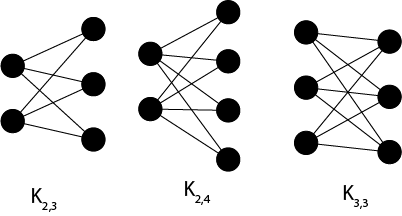

In [17]:
Image("Bipartite.png")

A graph $ G $ is bipartite, if and only if it has no odd cycles.

We can prove this by contradiction, i.e. assuming that a graph $ G $ has at least one odd cycle.  We'll call this cycle $ C = \left( {v}_{1}, {v}_{2}, \dots , {v}_{n}  \right) $ where $ n $ is odd.  Since the graph vertices is made up of two sets $ G = X \cup Y $ we have that any vertex $ {v}_{i} $ is either in $ X $ or in $ Y $:
$$ { v }_{ i }\in \begin{cases} X,i=odd \\ Y,i=even \end{cases} $$
Since $ n $ is odd and $ 1 $ is also odd, they are both in $ X $.  Also, since it is a cycle, they have to have an edge between them, $ \left( {v}_{1}{v}_{n} \right) \in E \left( G \right) $.  This cannot be for a bipartite graph, so we have a contradiction.

Now we have to show that no odd cycles in a graph implies that it is bipartite.  Now, suppose that all cycles in G have an even length, then:
- if $ G $ is disconnected then any cycle in $ G $ is contained in one of the connected components and we have to show the cycle for each component
- we therefor concentrate only on connected graphs, i.e. we assume $ G $ is connected

For any vertex $ v \in V \left( G \right) $ we will place some vertices in $ X $ and some in $ Y $.  The vertices belonging to $ X $ are an even distance away from $ v $ and those in $ Y $ are an odd distance from $ v $.  Since $ G $ is connected $ X \cup Y = V \left( G \right) $ and $ X \cap Y = \emptyset $.

We need to show that any edge in $ G $ is of the form $ xy $.  Our goal is to show that $ \left( xy \right) \notin E \left( G \right) $.   To do this we create a shortest path from $ v $ to $ x $ and call it $ P $ and $ v $ to $ y $ the same shorted path an call it $ Q $.  Now let's assume that $ x, y \in X $, so both $ P $ and $ Q $ must have the same parity.  Let $ w $ the last common vertex of $ P $ and $ Q $.  Remember that $ v $ is also common.  We'll call the bits between $ v $ and $ w $ $ {P}_{1} $ and $ {Q}_{1} $.  The rest of the paths after $ w $ will be $ {P}_{2} $ and $ {Q}_{2} $ respectively.  Since $ P $ and $ Q $ are shortest paths, it follows that the length of $ \left| {P}_{1} \right| = \left| {Q}_{1} \right| $.  Now so must the second part of the paths.  This furthermore means that $ xwy $ must be even, either by both being even or both being odd.   

Now, if $ \left( xy \right) $ is an edge of $ G $ then this path from $ x $ to $ w $ to $ y $ and back to $ x $ will be of odd length.  This is impossible since $ \left( xy \right) \notin E \left( G \right) $.

<hr>

A **Star** is a complete bipartite graph, $ {K}_{1,n} $, i.e. on the one side we have a single vertex.

[Back to the top](#In-this-lesson)

## Adjacency matrices

We can represent a graph as a matrix.  Write down the vertices as row and column names.  Each element $ {v}_{i}, {v}_{j} $ is given a value of $ 0 $ of the pair of vertices are not adjacent and a value of $ 1 $ if they are.

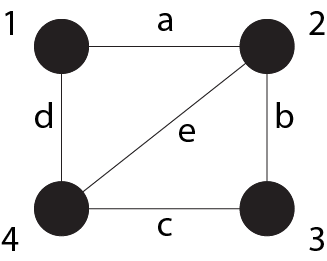

In [18]:
Image("Adjacency.png")

In [19]:
A = sym.Matrix([[0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 1], [1, 1, 1, 0]])
A

⎡0  1  0  1⎤
⎢          ⎥
⎢1  0  1  1⎥
⎢          ⎥
⎢0  1  0  1⎥
⎢          ⎥
⎣1  1  1  0⎦

In this view the row or the column sums indicate the degree of each specific vertex.

[Back to the top](#In-this-lesson)

## Incidence matrices

The rows are still labeled as the vertices.  The columns are labeled by the edges.  For each element $ {i}, {j} $ we have a $ 0 $ entry if vertex $ i $ does not belong to edge $ j $ and $ 1 $ if it does.  Note that if we have a loop, the entry become a $ 2 $.

In [20]:
M = sym.Matrix([[1, 0, 0, 1, 0], [1, 1, 0, 0, 1], [0, 1, 1, 0, 0], [0, 0, 1, 1, 1]])
M

⎡1  0  0  1  0⎤
⎢             ⎥
⎢1  1  0  0  1⎥
⎢             ⎥
⎢0  1  1  0  0⎥
⎢             ⎥
⎣0  0  1  1  1⎦

Now every column sum is $ 2 $ since every edge must have two adjacent vertices.  The row sum is still the degree of each vertex.

[Back to the top](#In-this-lesson)

## A first look at networkx

In [21]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 4), (2, 3), (2, 4), (3, 4)])

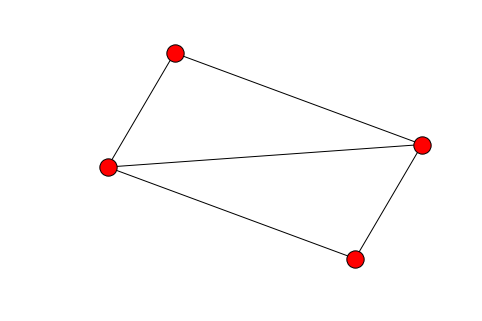

In [22]:
# Will be drawn differently every time
nx.draw(G)
plt.show();

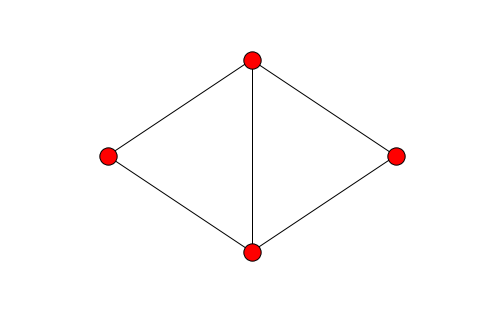

In [23]:
# Keeping is circular
nx.draw_circular(G)
plt.show();

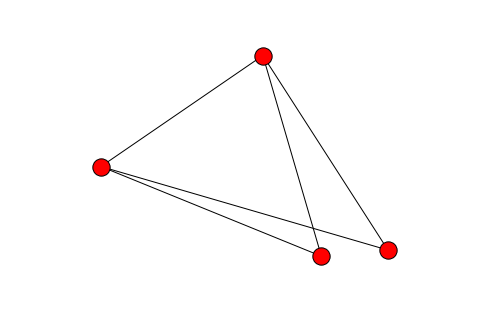

In [24]:
# Random
nx.draw_random(G)
plt.show();

In [25]:
# Getting back the adjance matrix from the graph G
A1 = nx.adjacency_matrix(G)
print(A1.todense())

[[0 1 0 1]
 [1 0 1 1]
 [0 1 0 1]
 [1 1 1 0]]


In [26]:
# Getting back the incidence matrix from the graph G
A2 = nx.incidence_matrix(G)
print(A2.todense())

[[ 1.  1.  0.  0.  0.]
 [ 1.  0.  1.  1.  0.]
 [ 0.  0.  1.  0.  1.]
 [ 0.  1.  0.  1.  1.]]


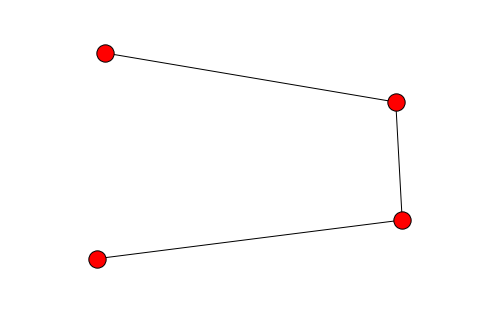

In [27]:
path_graph_4 = nx.path_graph(4)
nx.draw(path_graph_4)
plt.show();

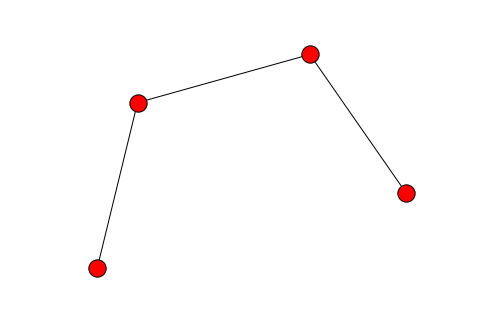

In [28]:
test_graph = nx.Graph()
test_graph.add_nodes_from(["red", "blue", "green", "orange"])
test_graph.add_edges_from([("red", "blue"), ("blue", "green"), ("green", "orange")])
nx.draw(test_graph)
plt.show();

In [29]:
GM = nx.isomorphism.GraphMatcher(path_graph_4,test_graph)
GM.is_isomorphic()

True

In [30]:
# Mapping the vertices
GM.mapping

{0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}

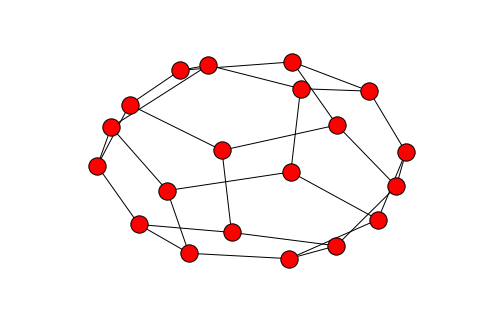

In [31]:
D = nx.dodecahedral_graph()
nx.draw(D)
plt.show();

Let's create two graphs and see if they are isomorphic.  The first, $ H $ has $ 8 $ vertices, $ 12 $ edges and is $ 3 $-regular.  So does $ F $.  Are they isomorphic, though?

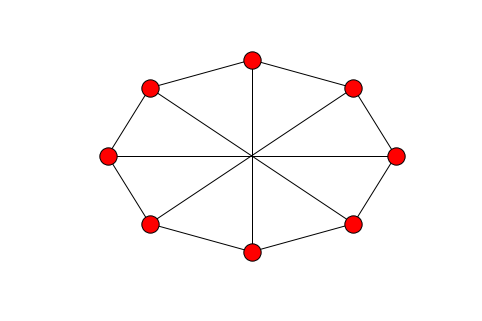

In [32]:
# A special graph called a circulant graph with 8 vertices and
# edges at distance 1 and 4
H = nx.circulant_graph(8, [1, 4])
nx.draw_circular(H)
plt.show();

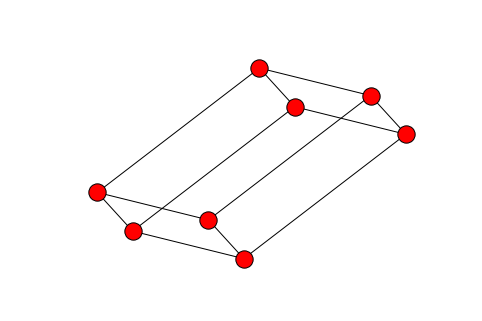

In [33]:
# Creating F from an adjacency matrix (using a numpy matrix)
F_mat = np.matrix([[0,1,0,1,1,0,0,0],
                  [1,0,1,0,0,1,0,0],
                  [0,1,0,1,0,0,1,0],
                  [1,0,1,0,0,0,0,1],
                  [1,0,0,0,0,1,0,1],
                  [0,0,0,0,1,0,1,0],
                  [0,0,1,0,0,1,0,1],
                  [0,0,0,1,1,0,1,0]])
F = nx.Graph(F_mat)
nx.draw(F, pos = nx.spectral_layout(F))
plt.show();

In [34]:
# Are they isomorphic given a similar number of vertices, edges and regularity?
HF = nx.isomorphism.GraphMatcher(H, F)
HF.is_isomorphic()

False

[Back to the top](#In-this-lesson)

## Graphs as combinations

Combinations, $ \begin{pmatrix} n \\ k \end{pmatrix}=\frac { n! }{ \left( n-k \right) !k! }  $, can be used in graph theory.  With the equations here we get a solution to the number of $ k $-sized subsets that can be made form an $ n $-sized set.  If we have a simple graph with $ n $ vertices, we can view the edges as $ 2 $-sized subsets.  Thus $ \begin{pmatrix} n \\ 2 \end{pmatrix} $ is the size of all possible edges.

So, for this simple graph we can have at most $ \begin{pmatrix} n \\ 2 \end{pmatrix} $ edges.  If the number of edges is indeed equal to $ \begin{pmatrix} n \\ 2 \end{pmatrix} $ then we have the complete graph $ {K}_{\begin{pmatrix} n \\ 2 \end{pmatrix}} $.

[Back to the top](#In-this-lesson)

## Neighbors of a vertex

The **Neigbors** of a vertex are all the vertices that share an edge with the particular vertex.  The neighbors of vertex $ v $ in the graph $ G $ are all the vertex elements $ u $ noted as $$ {N}_{G} \left( v \right) = u \in V \left( G \right) | uv \in E \left( G \right) $$

The number of such vertices are simply $ d \left( v \right) = \left| {N}_{G} \left( v \right) \right| = 4 $.

Let's create a graph using ```networkx``` and check for the neigbors of one of the vertices.

In [56]:
# Creating a graph from an adjacency matrix
G = nx.Graph(np.matrix([[0 ,1, 1, 0, 1, 1],
                       [1, 0, 1, 0, 0, 0],
                       [1, 1, 0, 1, 0, 0],
                       [0, 0, 1, 0, 1, 0],
                       [1, 0, 0, 1 ,0 ,0],
                       [1, 0, 0, 0, 0, 0]]))

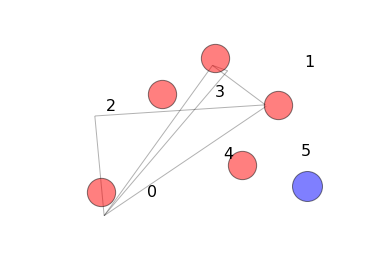

In [58]:
# Draw the first vertex (0) in blue
nx.draw_networkx_nodes(G,pos = nx.random_layout(G),
                       nodelist = [0],
                       node_color = 'b',
                       node_size = 900,
                       alpha = 0.5)

# Draw the rest of the vertices in red
nx.draw_networkx_nodes(G, pos = nx.random_layout(G),
                       nodelist = [1,2,3,4,5],
                       node_color = 'r',
                       node_size = 800,
                       alpha = 0.5)

# Draw the edges
nx.draw_networkx_edges(G, pos=nx.random_layout(G), alpha = 0.3)

# Draw the labels
nx.draw_networkx_labels(G, pos=nx.random_layout(G), font_size = 16)

# Plot specifics
plt.axis("off") # Turn off the x- and y-axis
plt.show();

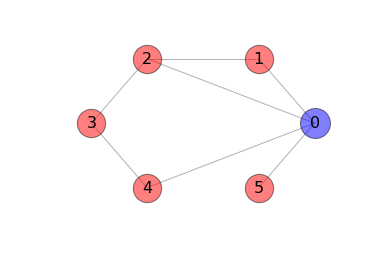

In [59]:
# Draw the first vertex (0) in blue
nx.draw_networkx_nodes(G,pos = nx.circular_layout(G),
                       nodelist = [0],
                       node_color = 'b',
                       node_size = 900,
                       alpha = 0.5)

# Draw the rest of the vertices in red
nx.draw_networkx_nodes(G, pos = nx.circular_layout(G),
                       nodelist = [1,2,3,4,5],
                       node_color = 'r',
                       node_size = 800,
                       alpha = 0.5)

# Draw the edges
nx.draw_networkx_edges(G, pos=nx.circular_layout(G), alpha = 0.3)

# Draw the labels
nx.draw_networkx_labels(G, pos=nx.circular_layout(G), font_size = 16)

# Plot specifics
plt.axis("off") # Turn off the x- and y-axis
plt.show();

We can list all the neighbors of vertex $ 0 $ using ```nx.neighbors()```.

In [37]:
nx.neighbors(G, 0)

[1, 2, 4, 5]

Now, let's look at the degrees of each vertex using ```nx.degree()```.  We'll see a dictionary with the name of the vertex (as the key) and the degree of that vertex (as a value).

In [38]:
nx.degree(G)

{0: 4, 1: 2, 2: 3, 3: 2, 4: 2, 5: 1}

[Back to the top](#In-this-lesson)

## Subgraphs

In the introduction to [graphs](#Graphs) we learned that a subgraph is created by removing, called **Deleting**, vertices or edges from an initial graph.

If we reconsider grapgh $ G $ from above, we can create a subgraph by deleting vertex $ 5 $ for instance.  It is noted as $ G - 5 $.

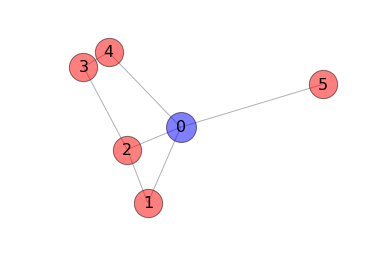

In [39]:
# The original graph G

# Draw the first vertex (0) in blue
nx.draw_networkx_nodes(G,pos = nx.spectral_layout(G),
                       nodelist = [0],
                       node_color = 'b',
                       node_size = 900,
                       alpha = 0.5)

# Draw the rest of the vertices in red
nx.draw_networkx_nodes(G, pos = nx.spectral_layout(G),
                       nodelist = [1,2,3,4,5],
                       node_color = 'r',
                       node_size = 800,
                       alpha = 0.5)

# Draw the edges
nx.draw_networkx_edges(G, pos=nx.spectral_layout(G), alpha = 0.3)

# Draw the labels
nx.draw_networkx_labels(G, pos=nx.spectral_layout(G), font_size = 16)

# Plot specifics
plt.axis("off") # Turn off the x- and y-axis
plt.show();

Now we use the ```.subgraph()``` method and list all the vertices to keep.

In [40]:
H = G.subgraph([0, 1, 2, 3, 4])

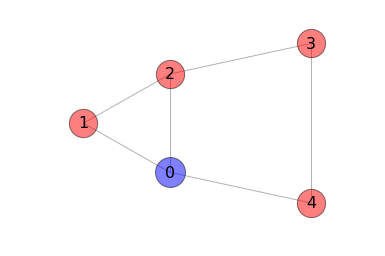

In [41]:
# Draw the new subgraph H

# Draw the first vertex (0) in blue
nx.draw_networkx_nodes(H,pos = nx.spectral_layout(H),
                       nodelist = [0],
                       node_color = 'b',
                       node_size = 900,
                       alpha = 0.5)

# Draw the rest of the vertices in red
nx.draw_networkx_nodes(H, pos = nx.spectral_layout(H),
                       nodelist = [1,2,3,4],
                       node_color = 'r',
                       node_size = 800,
                       alpha = 0.5)

# Draw the edges
nx.draw_networkx_edges(H, pos=nx.spectral_layout(H), alpha = 0.3)

# Draw the labels
nx.draw_networkx_labels(H, pos=nx.spectral_layout(H), font_size = 16)

# Plot specifics
plt.axis("off") # Turn off the x- and y-axis
plt.show();

Deleting an edge is denoted as $ G\setminus e $.  Below, we remove edge $ \left( 0, 1 \right) $ from graph $ H $.

In [42]:
H.remove_edge(0, 1) # The removal is permanent

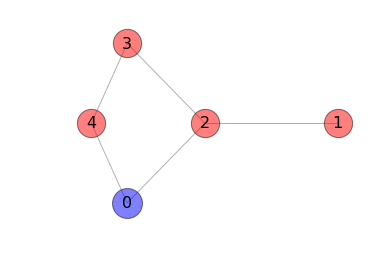

In [43]:
# Draw the new subgraph of H

# Draw the first vertex (0) in blue
nx.draw_networkx_nodes(H,pos = nx.spectral_layout(H),
                       nodelist = [0],
                       node_color = 'b',
                       node_size = 900,
                       alpha = 0.5)

# Draw the rest of the vertices in red
nx.draw_networkx_nodes(H, pos = nx.spectral_layout(H),
                       nodelist = [1,2,3,4],
                       node_color = 'r',
                       node_size = 800,
                       alpha = 0.5)

# Draw the edges
nx.draw_networkx_edges(H, pos=nx.spectral_layout(H), alpha = 0.3)

# Draw the labels
nx.draw_networkx_labels(H, pos=nx.spectral_layout(H), font_size = 16)

# Plot specifics
plt.axis("off") # Turn off the x- and y-axis
plt.show();

So if $ H $ is a subgraph of $ G $ then $ V\left( F \right) \subseteq V\left( G \right)  $ and $ E\left( F \right) \subseteq E\left( G \right)  $.

A **Spanning** subgraph refers to a subgraph that contains all the vertices of the original graphs, i.e. only and edge or edges are deleted.

A subgraph that we create by only removing vertices is called an **Induced Subgraph**.

[Back to the top](#In-this-lesson)

## Weighted graphs

To model some real-world scenario we can weight an edge, i.e. give it a natural number (positive integer, $ {\mathbb{Z}}^{+} $).  A distance of a path then becomes the sum of the weights.  This is aking to distance we discussed above.  There each weight was simply $ 1 $.

As we had a minimum distance between two vertices, we can also have a minimum *weight*.  We denote this as $ {d}_{G}^{\alpha} \left( u,v \right) $.

This can be done with **Dijkstra's algorithm**.

In [61]:
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_weighted_edges_from([("A", "B", 3), ("A", "D", 2), ("A", "C", 1),
                 ("D", "E", 1), ("E", "C", 4), ("C", "F", 2)])

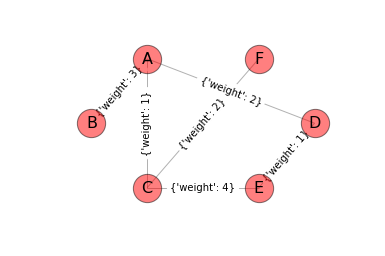

In [62]:
lo = nx.circular_layout(G)

# Draw the rest of the vertices in red
nx.draw_networkx_nodes(G, pos = lo,
                       nodelist = ["A", "B", "C", "D", "E", "F"],
                       node_color = 'r',
                       node_size = 800,
                       alpha = 0.5)

# Draw the edges
nx.draw_networkx_edges(G, pos = lo, alpha = 0.3)

# Label the edges
nx.draw_networkx_edge_labels(G, pos = lo, font_size = 10)

# Draw the labels
nx.draw_networkx_labels(G, pos = lo, font_size = 16)


# Plot specifics
plt.axis("off") # Turn off the x- and y-axis
plt.show();

If we start at vertex $ A $ we can calculate the shortest path to all the other vertices using ```nx.single_source_dijkstra()```.

In [63]:
nx.single_source_dijkstra(G, "A")

({'A': 0, 'B': 3, 'C': 1, 'D': 2, 'E': 3, 'F': 3},
 {'A': ['A'],
  'B': ['A', 'B'],
  'C': ['A', 'C'],
  'D': ['A', 'D'],
  'E': ['A', 'D', 'E'],
  'F': ['A', 'C', 'F']})

We can get the shortest distance to all the vetices using ```nx.all_pairs_dijkstra_path_length()```.  It returns a dictionary of dictionaries.

In [65]:
nx.all_pairs_dijkstra_path_length(G)

{'A': {'A': 0, 'B': 3, 'C': 1, 'D': 2, 'E': 3, 'F': 3},
 'B': {'A': 3, 'B': 0, 'C': 4, 'D': 5, 'E': 6, 'F': 6},
 'C': {'A': 1, 'B': 4, 'C': 0, 'D': 3, 'E': 4, 'F': 2},
 'D': {'A': 2, 'B': 5, 'C': 3, 'D': 0, 'E': 1, 'F': 5},
 'E': {'A': 3, 'B': 6, 'C': 4, 'D': 1, 'E': 0, 'F': 6},
 'F': {'A': 3, 'B': 6, 'C': 2, 'D': 5, 'E': 6, 'F': 0}}

Here is another example.

In [72]:
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_weighted_edges_from([("A", "B", 2), ("A", "C", 3), ("B", "C", 2),
                 ("C", "E", 1), ("E", "B", 3), ("B", "D", 1),
                          ("D", "F", 1), ("D", "E", 2), ("F", "E", 2),
                          ("B", "F", 3)])

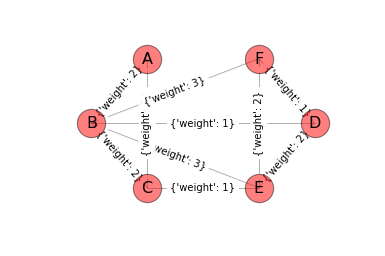

In [73]:
lo = nx.circular_layout(G)

# Draw the rest of the vertices in red
nx.draw_networkx_nodes(G, pos = lo,
                       nodelist = ["A", "B", "C", "D", "E", "F"],
                       node_color = 'r',
                       node_size = 800,
                       alpha = 0.5)

# Draw the edges
nx.draw_networkx_edges(G, pos = lo, alpha = 0.3)

# Label the edges
nx.draw_networkx_edge_labels(G, pos = lo, font_size = 10)

# Draw the labels
nx.draw_networkx_labels(G, pos = lo, font_size = 16)


# Plot specifics
plt.axis("off") # Turn off the x- and y-axis
plt.show();

In [74]:
nx.single_source_dijkstra(G, "A")

({'A': 0, 'B': 2, 'C': 3, 'D': 3, 'E': 4, 'F': 4},
 {'A': ['A'],
  'B': ['A', 'B'],
  'C': ['A', 'C'],
  'D': ['A', 'B', 'D'],
  'E': ['A', 'C', 'E'],
  'F': ['A', 'B', 'D', 'F']})

[Back to the top](#In-this-lesson)

## Tree graphs

A graph is a **Tree Graph**, $ T $, when it is connected, but has no cycle.  For any two vertices, there is only a single simple path (if there were more, we would have a cycle).   

A **Degenerate Tree** is a graph with only a single vertex and no edges.

Deleting an edge from a tree, results in the graph no longer being a tree.

The following statements are all equivalent for a finite graph
- $ T $ is a tree
- $ T $ is cycle-free and has $ n - 1 $ edges
- $ T $ is connected and has $ n - 1 $ edges

A **Spanning Tree** of a graph $ G $, is a tree that contains all the vertices of $ G $.  We simply remove some edges to render the graph without cycles.

If we weight all the edges and consider all the spanning trees, then the **Minimum Spanning Tree** is the one with the lowest possible weight.  Whereas the weight of a minimal spanning tree is unique, there may be more than one minimum spanning tree in a graph.

According to the method of Kruskal we place the edges in increasing weight (see image below).  We add each edge that does not result in a cycle until $ n - 1 $ edges are added.

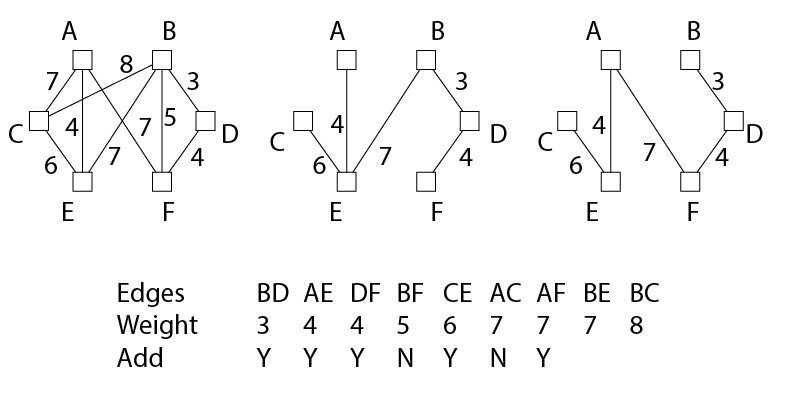

In [44]:
Image("MinSpanTree-01.png")

[Back to the top](#In-this-lesson)

## Planar graphs

We can represent a graph in such a way that its edges do not cross.  This is a **Planar Graph**.  In the (left side) $ {k}_{4} $ connected graph we replace the (dotted) edge to turn it into a planar graph.

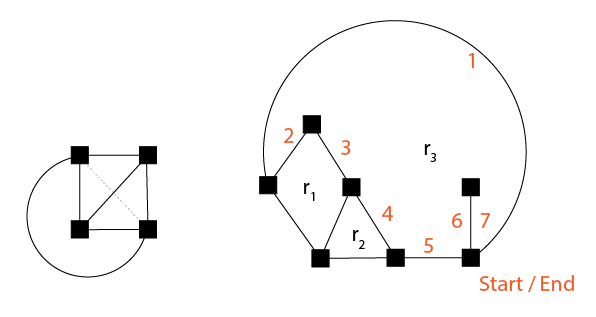

In [45]:
Image("Planar-01.png")

On the right we note a planar graph with $ 7 $ vertices and $ 9 $ edges.  This is called a **Map** and divides the plane into regions.  Note that we have $ 4 $ regions of which $ {r}_{1},{r}_{2} $ and $ {r}_{3} $ are bounded.  The region $ {r}_{4} $ (not indicated) is unbounded.

Each region has a border made up of edges and we can imagine walking along the border of each region.  The number of edges we walk along is called the **Degree** of the region.  Regions $ 1 $ and $ 2 $ in the map above have degrees of $ 4 $ and $ 3 $ respectively.  Note that region $ 3 $ has $ 7 $ borders as we have to go along one of the borders twice ( $ 6 $ and $ 7 $ ).  Finally, region $ 4 $ had $ 4 $ borders.

We can sum these degrees for a map.  Above we get $ 18 $, which is always twice the number of edges.  For $ V $ as the number of vertices, $ E $ the number of edges and $ R $ the number of regions we have the following from Euler
$$ V - E + R = 2 \\ 7 - 9 + 4 = 2 $$
This is only true for a connected graph

If we consider only simple graphs (not multigraphs with loops or parallel edges), we note that every region must have at least $ 3 $ borders.  This allows us to write the following
$$ V \ge 3E - 6 $$
Here we must have $ V \ge 3 $.

[Back to the top](#In-this-lesson)

## Nonplanar graphs

A good example of a non-planar graph consider three houses, each connected to single outlets of water, gas and electricitry.  This gives us a $ {K}_{3,3} $ graph with $ V = 6 $ and $ E = 9 $, which is not planar.

The Polish mathematician Kuratowski proved that a graph is non-planar if and only if it contains a subgraph homeomorphic to $ {K}_{3,3} $ or $ {K}_{5} $.

[Back to the top](#In-this-lesson)

## Coloring

The **Coloring** of a graph is simply the assignment of a categcorical variable (here the name of a color) to each vertex of a graph, such that adjacent graphs do not share the same color value.

The minimum number of colors required to color a graph is called the **Chromatic Number** of a graph, denoted by $ \chi \left( G \right) $.

The Welch-Powel algorith gives a method to color a graph, but does not always yield $ \chi \left( G \right) $.
+ Create a list of the vertices in a decreasing order of degrees
+ For colors $ {C}_{i} $ with $ i \in [1,n] $ assign the first color, $ {C}_{1} $ to the first vertex and then assign (in sequential order) the same color $ {C}_{1} $ to each vertex that is not adjacent to any previous vertex which has already had that color assigned to it
+ Repeat the step above starting with the highest ranked uncolored vertex and assign color $ {C}_{i+1} $ to it
+ Continue with this process assigning until $ {C}_{n} $

It is simple to see that in a complete graph, $ {K}_{n} $, where every node is connected to every other node that we would have $ \chi \left( K \right) = n $.

All planar graphs are $ 4 $-colorable.

[Back to the top](#In-this-lesson)

## A graph in computer memory

One way of representing a graph in computer memory is by the use of an adjacency matrix, called a **Sequential Representation** of a graph.<p/>
We also have the **Linked Representation**, also called the **Adjacency Structure** or **Linked List**.

A matrix is used when a graph is **Dense** and a Linked list when it is **Sparse**. A graph is dense when $ V = O \left( {E}^{2} \right) $.